### This is a kaggle competition - House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### Data exploration

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')
print("Number of rows: {}".format(data.shape[0]))
print("Number of columns: {}".format(data.shape[1]))
# calculate the percentage of nan values per feature
percentage_of_nan = (data.isna().sum().sort_values(ascending = False)/1460)
print("\nPercentage of NaN values\n{}".
      format(percentage_of_nan))

Number of rows: 1460
Number of columns: 81

Percentage of NaN values
PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.00

#### Dropping columns where more than 17% of the values are NaN

OBS: If the final results are not appropriate, then the feature 'LotFrontage' will be considered for the project. In this case, it will be created a model to predict those missing values.

In [2]:
data = data.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [3]:
display(data.head(5))
display(data.drop(columns = 'Id').corr())
display(data.describe())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Spliting the data into features and target variable

In [4]:
features = data.drop(columns=['Id', 'SalePrice'])
sale_price = data['SalePrice']

#### Visualizing the distribution of the target variable

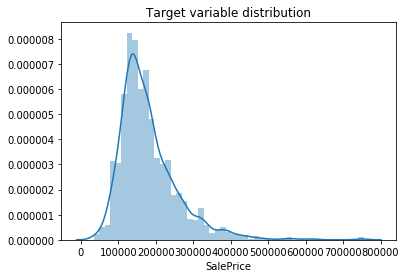

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(sale_price)
plt.title("Target variable distribution")
plt.show()

#### Pre-processing the target variable

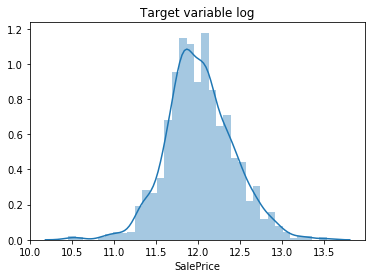

In [7]:
import numpy as np
sale_price = sale_price.apply(lambda x: np.log(x + 1))

sns.distplot(sale_price)
plt.title("Target variable log")
plt.show()

#### Pre-processing features

In [8]:
# Visualizing data types
features.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64


#### Getting column names for numerical data

In [9]:
# getting numerical columns names
numerical = features.select_dtypes(include= ['float', 'int']).columns
print("Number of numerical features: {}".format(len(numerical)))
pd.set_option('display.max_columns', 500)
features[numerical].head()

Number of numerical features: 36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


#### Scaling and normalizing numerical features

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Log transformation
features[numerical] = features[numerical].apply(lambda x: np.log(x + 1))
# MinMaxScaler transformation
features[numerical] = scaler.fit_transform(features[numerical])

#### Replacing NaN to mean in numerical data

In [11]:
from sklearn.impute import SimpleImputer

imp_nan = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_nan.fit(features[numerical])
features[numerical] = imp_nan.transform(features[numerical])
# verifying if is there any missing value
features[numerical].isna().sum().sort_values(ascending = False)

YrSold           0
MoSold           0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
HalfBath         0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
MSSubClass       0
dtype: int64

#### Verifying the number of categorical features

In [12]:
categorical = features.select_dtypes(exclude= ['float', 'int']).columns
print("Number of categorical features: {}".format(len(categorical)))
features[categorical].head()

Number of categorical features: 38


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Replacing NaN to None in categorical features

In [13]:
features[categorical] = features[categorical].fillna('None')
# verifying if is there any missing value
features[categorical].isna().sum().sort_values(ascending = False)

SaleCondition    0
Condition2       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
SaleType         0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
MSZoning         0
dtype: int64

#### One hot enconding for categorical features

In [14]:
features_final = pd.get_dummies(features)
# print("Number of pre-processed features: {}".format(features_final.shape[1]))
# display(features_final.head(5))
features_final.isna().sum().sort_values(ascending = False)
features_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa

#### PCA Analysis
Reduce the number of components to capture at least 80% of the variance. 

In [15]:
from sklearn.decomposition import PCA

n_components = 45
# Creating the PCA object
pca = PCA(n_components = n_components)
pca.fit(features_final)
# reducing the number of features
reduced_features = pca.transform(features_final)
reduced_features = pd.DataFrame(reduced_features)
print("Number of features obtained from one-hot encoding: {}".format(features_final.shape[1]))
print("The number of features was reduced by {} columns".format(features_final.shape[1] - n_components))
print("Now it has {} components and the explained variance is {}".
      format(n_components, pca.explained_variance_ratio_.sum()))


Number of features obtained from one-hot encoding: 280
The number of features was reduced by 235 columns
Now it has 45 components and the explained variance is 0.8026829247273809


### Machine learning model

To train the ML model, first the data will be splitted into training and testing. In addition, it will be applied the k-fold cross validation method.

Next, it will be tested 3 different algorithms (tested without proper tuning).
    * Decision Tree Regressor
    * SVM
    * Lasso

Based on those results, the model with the most efficient performance will be chosen and tuned using GridSearch technique.

OBS: The metrics are R2 and MSE

#### Splitting the data into training and testing sets as well as creating a cross validation set

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

# Splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features_final, sale_price,
                                                    test_size = 0.2, random_state = 33 )
# Cross validation sets
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 33)

#### Creating a regression model based on Decision Tree Regressor


In [17]:
# Decision Tree Regressor Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_r2_scr = r2_score(y_train, y_pred_train)
test_r2_scr = r2_score(y_test, y_pred_test)
train_MSE_scr = MSE(y_train, y_pred_train)
test_MSE_scr = MSE(y_test, y_pred_test)

print("Training r2 score: {}".format(train_r2_scr))
print("Testing r2 score: {}".format(test_r2_scr))
print("Training MSE score: {}".format(train_MSE_scr))
print("Testing MSE score: {}".format(test_MSE_scr))

Training r2 score: 0.999999994670334
Testing r2 score: 0.7764300348975005
Training MSE score: 8.456457614484847e-10
Testing MSE score: 0.036299312687141934


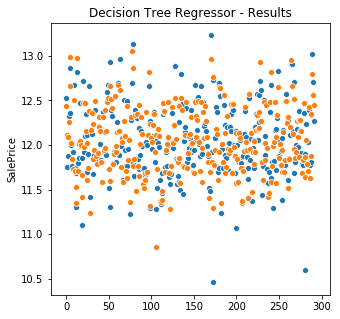

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
sns.scatterplot(range(0, y_test.shape[0]), y_test)
sns.scatterplot(range(0,y_pred_test.shape[0]), y_pred_test)
plt.title("Decision Tree Regressor - Results")
plt.show()

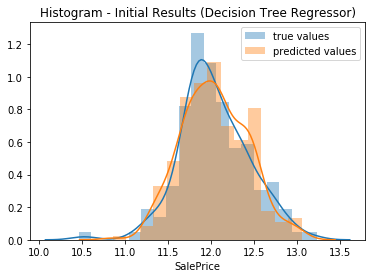

In [19]:
# Plotting a histogram of the Decision Tree
sns.distplot(y_test, label = 'true values')
sns.distplot(y_pred_test, label = 'predicted values')
plt.title("Histogram - Initial Results (Decision Tree Regressor)")
plt.legend()
plt.show()

#### SVM Regressor Model

In [20]:
from sklearn.svm import SVR

model = SVR(gamma = 'scale')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_r2_scr = r2_score(y_train, y_pred_train)
test_r2_scr = r2_score(y_test, y_pred_test)
train_MSE_scr = MSE(y_train, y_pred_train)
test_MSE_scr = MSE(y_test, y_pred_test)

print("Training r2 score: {}".format(train_r2_scr))
print("Testing r2 score: {}".format(test_r2_scr))
print("Training MSE score: {}".format(train_MSE_scr))
print("Testing MSE score: {}".format(test_MSE_scr))

Training r2 score: 0.9518178784143652
Testing r2 score: 0.8552973162607829
Training MSE score: 0.007644945665066517
Testing MSE score: 0.023494246918678467


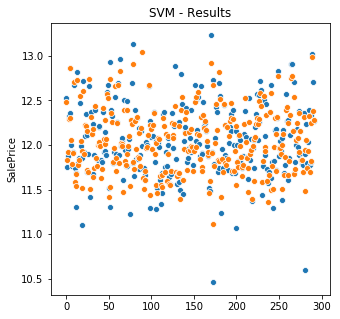

In [21]:
import seaborn as sns

plt.figure(figsize = (5, 5))
sns.scatterplot(range(0,292), y_test)
sns.scatterplot(range(0,292), y_pred_test)
plt.title("SVM - Results")
plt.show()

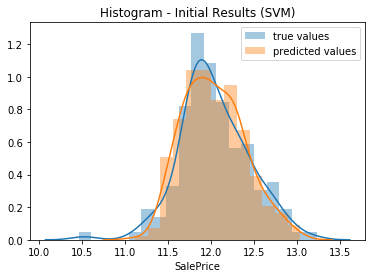

In [22]:
# Plotting a histogram of the initial results
sns.distplot(y_test, label = 'true values')
sns.distplot(y_pred_test, label = 'predicted values')
plt.title("Histogram - Initial Results (SVM)")
plt.legend()
plt.show()

#### Lasso Model

In [23]:
# Lasso model
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_r2_scr = r2_score(y_train, y_pred_train)
test_r2_scr = r2_score(y_test, y_pred_test)
train_MSE_scr = MSE(y_train, y_pred_train)
test_MSE_scr = MSE(y_test, y_pred_test)

print("Training r2 score: {}".format(train_r2_scr))
print("Testing r2 score: {}".format(test_r2_scr))
print("Training MSE score: {}".format(train_MSE_scr))
print("Testing MSE score: {}".format(test_MSE_scr))

Training r2 score: 0.0
Testing r2 score: -0.0016878056292712884
Training MSE score: 0.1586676844746041
Testing MSE score: 0.16263624165600168


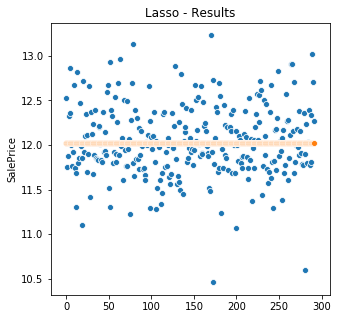

In [24]:
import seaborn as sns

plt.figure(figsize = (5, 5))
sns.scatterplot(range(0,292), y_test)
sns.scatterplot(range(0,292), y_pred_test)
plt.title("Lasso - Results")
plt.show()

/home/yuri/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yuri/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


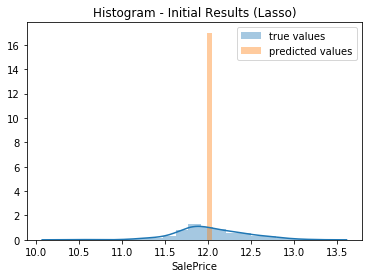

In [25]:
# Plotting a histogram of the initial results
sns.distplot(y_test, label = 'true values')
sns.distplot(y_pred_test, label = 'predicted values')
plt.title("Histogram - Initial Results (Lasso)")
plt.legend()
plt.show()

### Based on the first evaluation results, the selected model was SVM. 
#### Thus, the next step is to tune the model

In [26]:
# SVM Regressor model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Parameters
scorer = make_scorer(r2_score)
parameters = {'C':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2],
              'kernel': ['rbf', 'poly'],
              'degree': range(1,7),
              'gamma': ['scale']}
model = SVR()
# Grid search
grid_obj = GridSearchCV(model, parameters, scoring = scorer, cv = cv_sets)
grid_fit = grid_obj.fit(X_train, y_train)

In [27]:
# Getting the best classifier
best_clf = grid_fit.best_estimator_
# Training prediction
y_pred_train = best_clf.predict(X_train)
train_scr = MSE(y_train, y_pred_train)
# Testing prediction
y_pred_test = best_clf.predict(X_test)
test_scr = MSE(y_test, y_pred_test)

train_r2_scr = r2_score(y_train, y_pred_train)
test_r2_scr = r2_score(y_test, y_pred_test)
train_MSE_scr = MSE(y_train, y_pred_train)
test_MSE_scr = MSE(y_test, y_pred_test)

print("Training r2 score: {}".format(train_r2_scr))
print("Testing r2 score: {}".format(test_r2_scr))
print("Training MSE score: {}".format(train_MSE_scr))
print("Testing MSE score: {}".format(test_MSE_scr))


print("Classifier: ")
print(best_clf)

Training r2 score: 0.9366473866490094
Testing r2 score: 0.8391056575110245
Training MSE score: 0.010052012465816568
Testing MSE score: 0.02612316034902907
Classifier: 
SVR(C=10.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


#### Transform the results to original scale

Previous Pre-precessing
- f(x) = log(x + 1)

Transforming to original scale
- f^-1(x) = exp(x) - 1


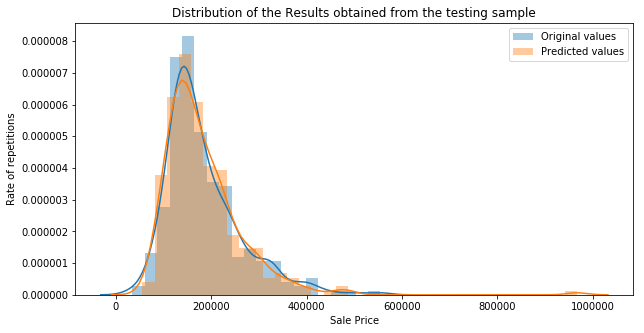

In [28]:
# Trasforming the results to the original scale
y_test = pd.DataFrame(y_test)
y_test_inv = y_test.apply(lambda x: np.exp(x)-1)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test_inv = y_pred_test.apply(lambda x: np.exp(x)-1)

# Visualizing the results
plt.figure(figsize=(10, 5))
sns.distplot(y_test_inv, label = 'Original values')
sns.distplot(y_pred_test_inv, label = 'Predicted values')
plt.title("Distribution of the Results obtained from the testing sample")
plt.ylabel("Rate of repetitions")
plt.xlabel("Sale Price")
plt.legend()
plt.show()

### Analyzing the testing data

In [29]:
data_test = pd.read_csv('test.csv')
print("Number of rows: {}".format(data_test.shape[0]))
print("Number of columns: {}".format(data_test.shape[1]))
# calculate the percentage of nan values per feature
percentage_of_nan = (data_test.isna().sum().sort_values(ascending = False)/1459)
print("\nPercentage of NaN values\n{}".
      format(percentage_of_nan))

Number of rows: 1459
Number of columns: 80

Percentage of NaN values
PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
LotFrontage      0.155586
GarageCond       0.053461
GarageQual       0.053461
GarageYrBlt      0.053461
GarageFinish     0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtQual         0.030158
BsmtExposure     0.030158
BsmtFinType1     0.028787
BsmtFinType2     0.028787
MasVnrType       0.010966
MasVnrArea       0.010281
MSZoning         0.002742
BsmtHalfBath     0.001371
Utilities        0.001371
Functional       0.001371
BsmtFullBath     0.001371
BsmtFinSF2       0.000685
BsmtFinSF1       0.000685
Exterior2nd      0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
SaleType         0.000685
Exterior1st      0.000685
                   ...   
OverallQual      0.000000
SaleCondition    0.000000
Heating          0.000000
ExterQual        0.000000
TotRmsAbvGrd     0.00

#### Execute the same pre-processing steps used on the training data

In [30]:
data_test = data_test.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])
features_test = data_test.drop(columns=['Id'])
ids = data_test['Id']
# Normalizing data
scaler = MinMaxScaler()
# Log transformation
features_test[numerical] = features_test[numerical].apply(lambda x: np.log(x + 1))
# MinMaxScaler transformation
features_test[numerical] = scaler.fit_transform(features_test[numerical])
# Treating missing values. Numerical: receives 'mean'. Categorical: receives 'None'
imp_nan = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_nan.fit(features_test[numerical])
features_test[numerical] = imp_nan.transform(features_test[numerical])
features_test[categorical] = features_test[categorical].fillna('None')
# One hot encoding
features_test = pd.get_dummies(features_test)

#### Verifying the number of columns after one-hot encoding

In [31]:
print("Number of columns of the training data {}".format(features_final.shape[1]))
print("Number of columns of the testing data {}".format(features_test.shape[1]))

Number of columns of the training data 280
Number of columns of the testing data 270


#### Apply align to use the same number of features in training and testing data

In [32]:
# features_final: training data
# features_test: testing data
features_final, features_test = features_final.align(features_test, join='inner', axis=1)
print("Number of columns of the training data {}".format(features_final.shape[1]))
print("Number of columns of the testing data {}".format(features_test.shape[1]))


Number of columns of the training data 263
Number of columns of the testing data 263


In [33]:
# verifying the results
# training data
display(features_final.head())
# testing data
display(features_test.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleTy

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleTy

### Since the number of features has changed, the model will be trained again with the training data, considering the aligned features

#### Fitting the model again with training data

In [34]:
# Splitting training data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features_final, sale_price,
                                                    test_size = 0.2, random_state = 33 )
# Cross validation sets
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 33)
# SVM Regressor model
model = SVR()
# Grid search
grid_obj = GridSearchCV(model, parameters, scoring = scorer, cv = cv_sets)
grid_fit = grid_obj.fit(X_train, y_train)

In [35]:
# Getting the best classifier
best_clf = grid_fit.best_estimator_
# Training prediction
y_pred_train = best_clf.predict(X_train)
train_scr = MSE(y_train, y_pred_train)
# Testing prediction
y_pred_test = best_clf.predict(X_test)
test_scr = MSE(y_test, y_pred_test)

train_r2_scr = r2_score(y_train, y_pred_train)
test_r2_scr = r2_score(y_test, y_pred_test)
train_MSE_scr = MSE(y_train, y_pred_train)
test_MSE_scr = MSE(y_test, y_pred_test)

print("Training r2 score: {}".format(train_r2_scr))
print("Testing r2 score: {}".format(test_r2_scr))
print("Training MSE score: {}".format(train_MSE_scr))
print("Testing MSE score: {}".format(test_MSE_scr))


print("Classifier: ")
print(best_clf)

Training r2 score: 0.9361061144579648
Testing r2 score: 0.8415910147606467
Training MSE score: 0.010137894871040125
Testing MSE score: 0.02571963226375193
Classifier: 
SVR(C=10.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


### Predicting the sales price of the testing data

In [37]:
# Predicting the sales price
sales_price_pred = best_clf.predict(features_test)
# Transforming the results to the original scale
sales_price_pred = pd.DataFrame(sales_price_pred)
sales_price_pred = sales_price_pred.apply(lambda x: np.exp(x)-1)

#### Creating the submission file

In [44]:

submission = pd.DataFrame({'Id':ids, 'SalePrice': sales_price_pred[0]})

import datetime
date = datetime.date.today()
filename = "housing_submission_" + str(date.day) + "-" + str(date.month) + "-" + str(date.year) + ".csv"
submission.to_csv(filename, index = False)
print("saved file: " + filename)

saved file: housing_submission_30-7-2019.csv
